# Online Payment Fraud Detection
##### Problem Statement:
Online payment fraud detection is a common problem that businesses face when processing payments online. The goal is to detect fraudulent transactions before they are processed and approved, in order to prevent financial losses and protect the business and its customers.     

 One approach to tackle this problem is   

 #### Transaction Monitoring: 
 This involves using machine learning algorithms to analyze transactions in real-time, looking for patterns or anomalies that may indicate fraud. For example, a sudden increase in the number of transactions or a change in transaction patterns may indicate fraudulent activity.     

 Hence, inorder to identify online payment fraud with machine learning, we need to train a machine learning model for classifying fraudulent and non-fraudulent payments.

### About Dataset:
There are 6362620 rows and 11 columns in our dataset.

step : represents a unit of time where 1 step equals 1 hour   
type : type of online transaction 
amount : the amount of the transaction 
nameOrig : customer starting the transaction  
oldbalanceOrg : balance before the transaction  
newbalanceOrig : balance after the transaction  
nameDest : recipient of the transaction  
oldbalanceDest : initial balance of recipient before the transaction     
newbalanceDest : the new balance of recipient after the transaction    
isFraud : fraud transaction    
isFlaggedFraud : Flagged fraud transaction   

### Importing packages

In [1]:
import numpy as np
import pandas as pd
import warnings 
warnings.filterwarnings("ignore")
import matplotlib
import matplotlib.pyplot as plt
from sklearn.utils import resample
import seaborn as sns
from sklearn.metrics import fbeta_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
%matplotlib inline 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

### Loading Dataset

In [2]:
df=pd.read_csv("Online_Payment.csv")

##### Processing and Manipulating the Data

In [3]:
df.shape

(1048575, 11)

In [4]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,NaN,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [6]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048479e+06,1.048492e+06,1.048575e+06,1048575.0
mean,2.696617e+01,1.586670e+05,8.740095e+05,8.938089e+05,9.781061e+05,1.114072e+06,1.089097e-03,0.0
std,1.562325e+01,2.649409e+05,2.971751e+06,3.008271e+06,2.296660e+06,2.416170e+06,3.298351e-02,0.0
min,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,1.500000e+01,1.214907e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
50%,2.000000e+01,7.634333e+04,1.600200e+04,0.000000e+00,1.263339e+05,2.182538e+05,0.000000e+00,0.0
75%,3.900000e+01,2.137619e+05,1.366420e+05,1.746000e+05,9.159084e+05,1.149778e+06,0.000000e+00,0.0
max,9.500000e+01,1.000000e+07,3.890000e+07,3.890000e+07,4.210000e+07,4.220000e+07,1.000000e+00,0.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048479 non-null  float64
 8   newbalanceDest  1048492 non-null  float64
 9   isFraud         1048575 non-null  int64  
 10  isFlaggedFraud  1048575 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 88.0+ MB


##### Finding Null values in the dataset

In [8]:
df.isnull().sum()

step               0
type               0
amount             0
nameOrig           0
oldbalanceOrg      0
newbalanceOrig     0
nameDest           0
oldbalanceDest    96
newbalanceDest    83
isFraud            0
isFlaggedFraud     0
dtype: int64

###### Replacing Null value into Median

In [9]:
median1=df["newbalanceDest"].median()
df["newbalanceDest"]=df["newbalanceDest"].replace(np.NaN,median1)

In [10]:
median2=df["oldbalanceDest"].median()
df["oldbalanceDest"]=df["oldbalanceDest"].replace(np.NaN,median2)

In [11]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

###### Finding Duplicates

In [12]:
df.duplicated().sum()

0


###### There is no duplictaes in the dataset

In [13]:
x=['step','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

### Exploratory Data Analysis and Visualization
###### Univariate Analysis

Univariate analysis is used to analyze the data of single variable. Here we will analyze using histplot

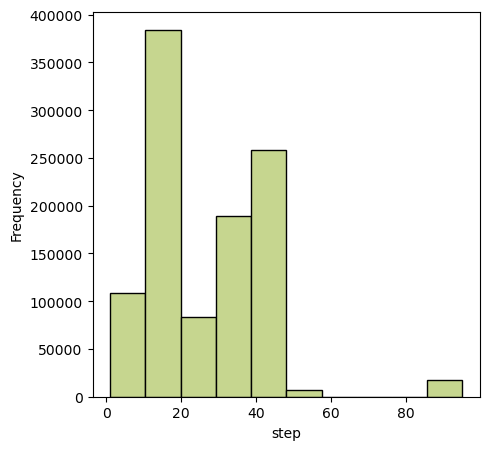

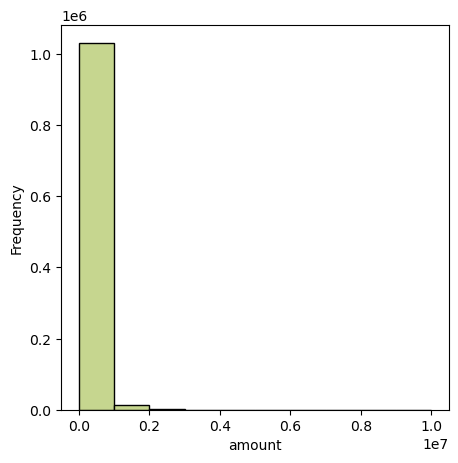

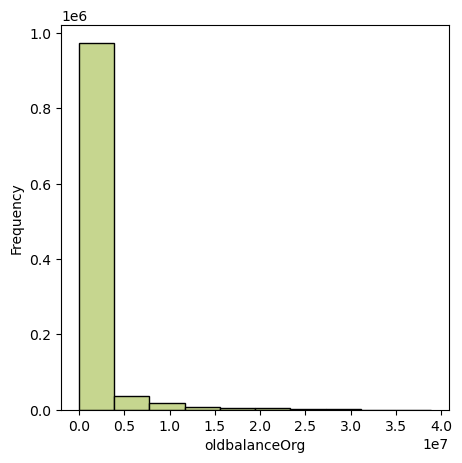

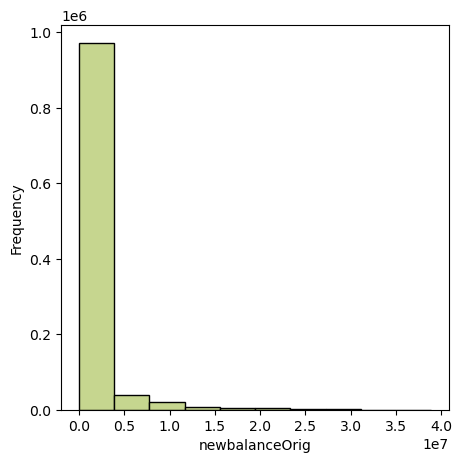

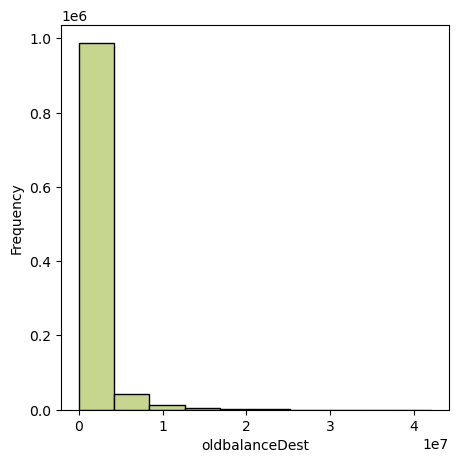

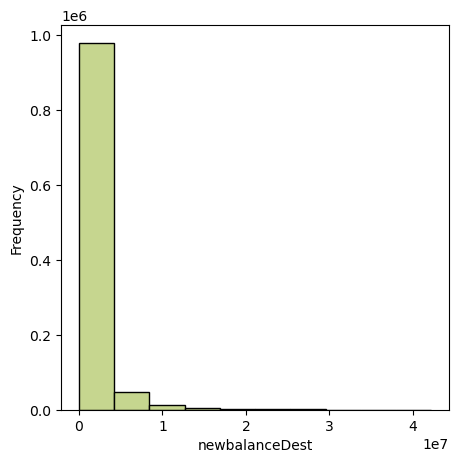

In [14]:
for i in x:
    plt.xlabel(i)
    df[i].plot(kind='hist', figsize=(5,5), facecolor='#C6D68F',edgecolor='black')
    plt.show()

###### We could see some outliers in the plots. So let's work on it.

##### Handling outliers

We'll use Quantile-based Flooring and Capping for these columns.

Capping is replacing all higher side values exceeding a certain theoretical maximum or upper control limit (UCL) by the UCL value. Here we'll do 90th percentile for higher values.

Flooring is replacing all values falling below a certain theoretical minimum or lower control limit (UCL) by the LCL value. Here we'll do 10th percentile for Lower values.

In [15]:
feature=['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

In [16]:
for i in feature:
    print(i)
    print(df[i].quantile(0.10))
    print(df[i].quantile(0.90))
    print('\n')

amount
4220.57
373075.3779999999


oldbalanceOrg
0.0
1924613.1739999996


newbalanceOrig
0.0
2059503.9359999998


oldbalanceDest
0.0
2721262.164


newbalanceDest
0.0
3102464.72




###### Now we'll remove the outlier.

In [17]:
feature=['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

In [18]:
for i in feature:
    lower = df[i].quantile(0.10)
    upper = df[i].quantile(0.90)
    df[i] = np.where(df[i] <lower, lower,df[i])
    df[i] = np.where(df[i] >upper, upper,df[i])
    print('Feature: ',i)
    print('Skewness value: ',df[i].skew())
    print('\n')

Feature:  amount
Skewness value:  0.7964930444208819


Feature:  oldbalanceOrg
Skewness value:  2.1881516694642875


Feature:  newbalanceOrig
Skewness value:  2.1770209559093807


Feature:  oldbalanceDest
Skewness value:  1.3855010903019762


Feature:  newbalanceDest
Skewness value:  1.3046862541014848




###### Now we'll take a look at it after removing outliers.

In [19]:
feature=['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

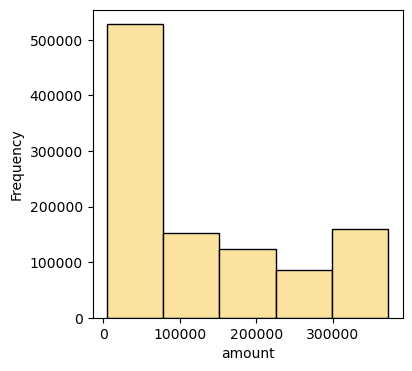

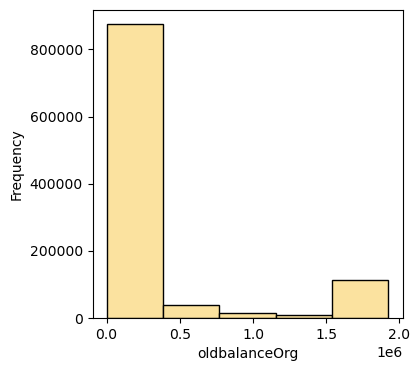

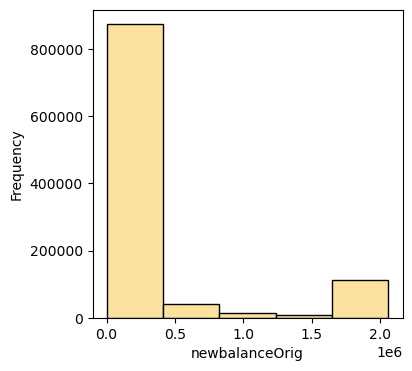

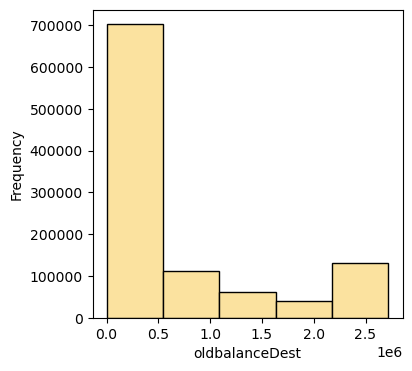

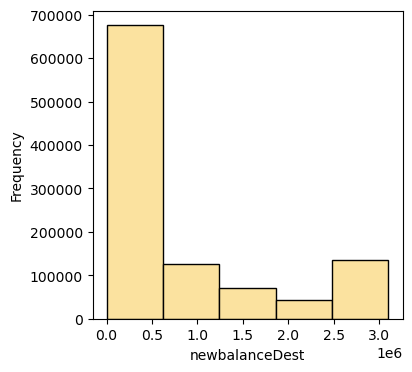

In [20]:
for i in feature:
    plt.xlabel(i)
    df[i].plot(kind='hist', bins=5, figsize=(4,4), facecolor='#FBE29F',edgecolor='black')
    plt.show()

###### After outlier treatment:

We have a maximum set of distribution between 150000 to 400000 of step

Amount ranges between 0-35 lakhs with more values ranging between 0-75,000

OldbalanceOrg ranges around 0-18 lakh with more frequency around 0-375,000

NewbalanceOrig ranges around 0-19 lakh with more frequency around 0-375,000

OldbalanceDest ranges around 0-29 lakh with common values around 0-625,000

NewbalanceDest ranges around 0-35 lakh with common values around 0-625,000

###### 1. Let's take a closer look at 'type' column.

In [21]:
df.type.unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [22]:
payment = df.type.value_counts()
payment

CASH_OUT    373641
PAYMENT     353873
CASH_IN     227130
TRANSFER     86753
DEBIT         7178
Name: type, dtype: int64

As we have already seen there are 5 types of payment happened.

More money has been transacted mostly through cash out followed by payment type.

Let's plot it using horizontal bar

<Axes: >

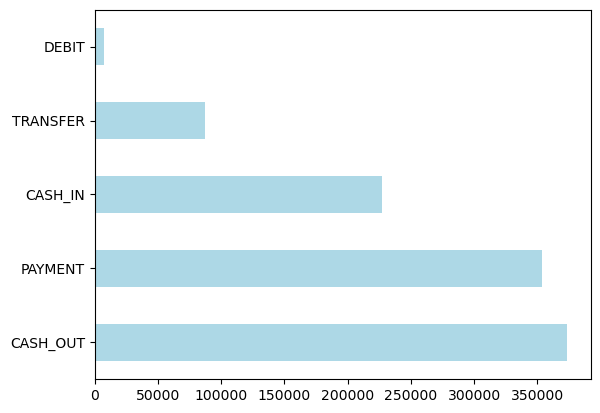

In [23]:
payment.plot(kind='barh',color="lightblue")

###### We could see the range of the types(Debit,Transfer,Cash-in,Payment and Cash-out)

<Axes: xlabel='type', ylabel='count'>

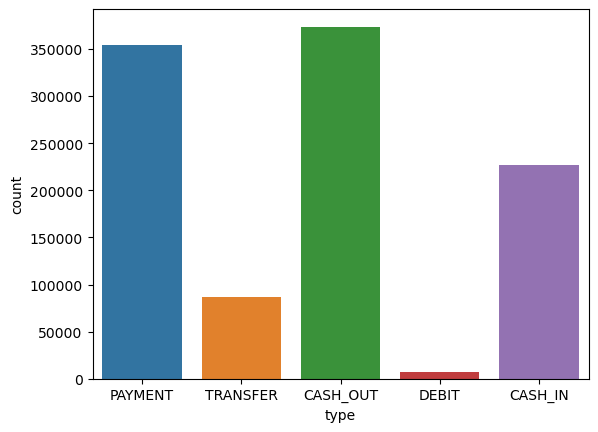

In [24]:
sns.countplot(x='type', data=df)

###### By this graph we could understand the cash-out has high amount of Transaction and followed by Payment , Cash-in and Transfer

#### 2. Let's look at the relationship with type column with isfraud column

In [25]:
cross_tab_result=pd.crosstab(index=df.type,columns=df.isFraud)
cross_tab_result

isFraud,0,1
type,,
CASH_IN,227130,0
CASH_OUT,373063,578
DEBIT,7178,0
PAYMENT,353873,0
TRANSFER,86189,564


In [26]:
cross_tab_result[1]

type
CASH_IN       0
CASH_OUT    578
DEBIT         0
PAYMENT       0
TRANSFER    564
Name: 1, dtype: int64

###### We can see that fraud occurred mostly while during transfer or cashout

<Axes: xlabel='type'>

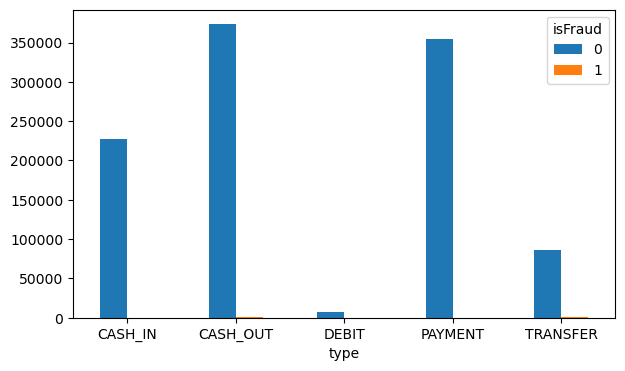

In [27]:
cross_tab_result.plot.bar(figsize=(7,4), rot=0)

#####  we could see there is an Fraud occurance in the Cash-out and Transfer type of transactions.

<Axes: xlabel='type'>

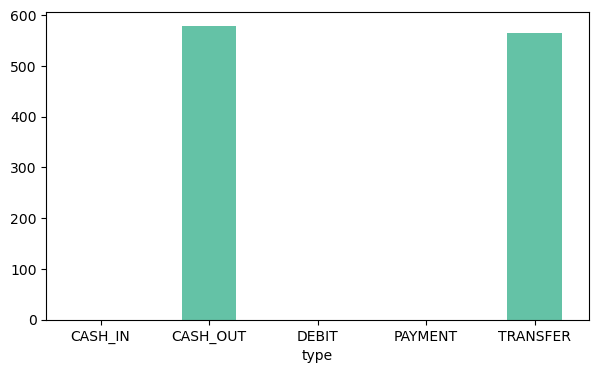

In [28]:
cross_tab_result[1].plot.bar(figsize=(7,4), rot=0,color="#64C2A6")

##### By bar-graph we clearly see there is occurance of fraud only in the Cash-out and Transfer type and also count of the fraud occurance is:

In [29]:
cross_tab_result

isFraud,0,1
type,,
CASH_IN,227130,0
CASH_OUT,373063,578
DEBIT,7178,0
PAYMENT,353873,0
TRANSFER,86189,564


In [30]:
cashout= (2233384 + 4116)
cashout_fraud= 4116/(cashout) * 100
cashout_fraud

0.18395530726256984

###### 0.184 % denotes the percentage of fraud happened in total cashout mode type, which is very less%

In [31]:
transfer= 528812+4097
transfer_fraud = 4097/(transfer) * 100
transfer_fraud

0.7687991758442811

###### 0.769 % denotes the percentage of fraud happened in total tranfer mode type, which is very also less%

#### 3. Let's take a closer look at amount column

In [32]:
df.amount

0            9839.64
1            4220.57
2            4220.57
3            4220.57
4           11668.14
             ...    
1048570    132557.35
1048571      9917.36
1048572     14140.05
1048573     10020.05
1048574     11450.03
Name: amount, Length: 1048575, dtype: float64

###### 4 .Let's check the minimum and maximum range amount.

In [33]:
print('Minimum: ',df.amount.min())
print('Maximum: ',df.amount.max())

Minimum:  4220.57
Maximum:  373075.3779999999


<Axes: ylabel='amount'>

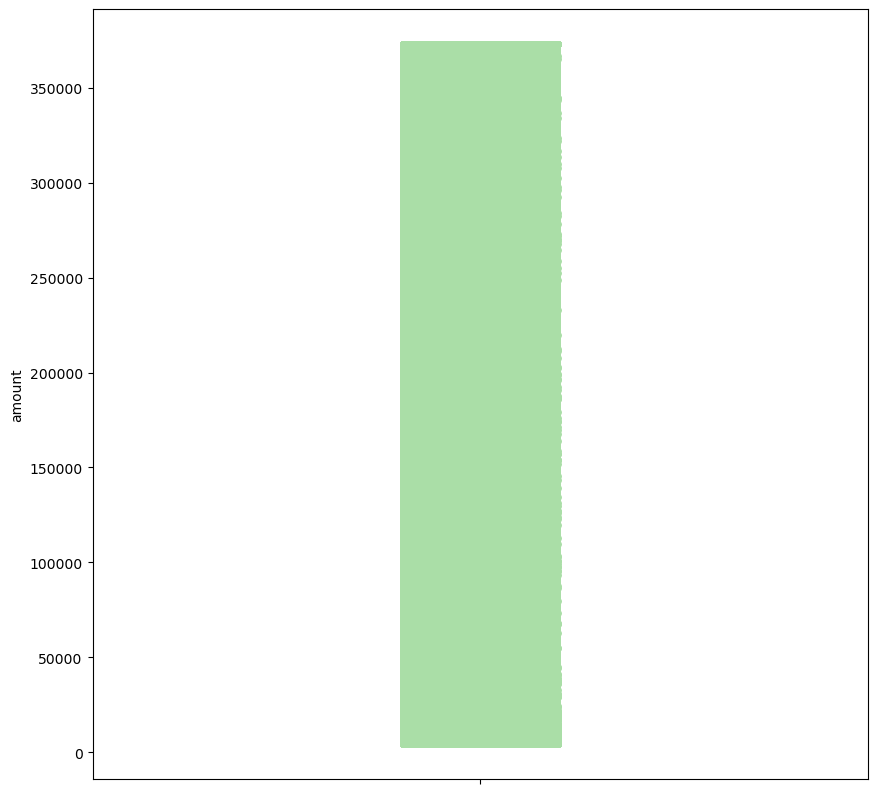

In [34]:
plt.figure(figsize=(10,10))
sns.stripplot(y=df.amount,color="#AADEA7")

###### 5.  Let's check the relationship of amount column with isFraud column

<Axes: title={'center': 'amount'}, xlabel='isFraud'>

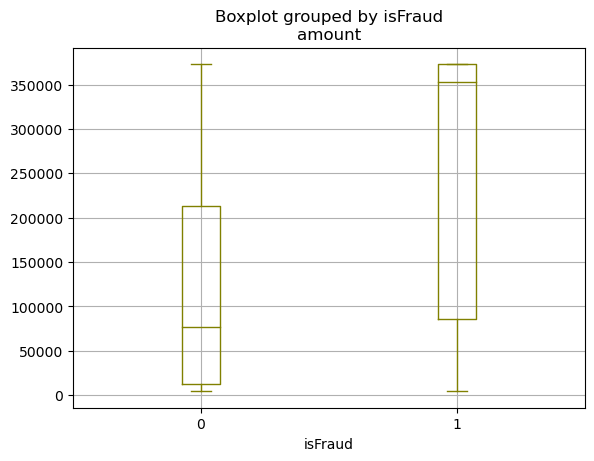

In [35]:
df.boxplot(column='amount', by='isFraud',color="olive")

##### Fraud amount transaction range is between 1.3-3.6 lakh

In [36]:
total_fraud= df[df.isFraud ==1]
total_fraud = total_fraud.shape[0]
total_fraud

1142

In [37]:
total_transactions = df.shape[0]

fraud_transaction = df[df.isFraud==1].shape[0]

fraud_percent= fraud_transaction/total_transactions * 100
fraud_percent

0.10890971079798775

In [38]:
print('Total transactions: ',total_transactions)
print('Total fraud transactions happened: ',fraud_transaction)
print("Total fraud transaction percent: ",round(fraud_percent,2))

Total transactions:  1048575
Total fraud transactions happened:  1142
Total fraud transaction percent:  0.11


In [39]:
fraud_amount= df[df.isFraud==1]
fraud_amount=fraud_amount.sort_values(by=['amount'],ascending=False)
fraud_amount

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1025194,48,CASH_OUT,373075.378,C274359236,1215297.01,0.0,C1653022223,2497294.920,3102464.72,1,0
992140,45,TRANSFER,373075.378,C1582972194,1069508.42,0.0,C284364603,0.000,0.00,1,0
955157,44,TRANSFER,373075.378,C369936121,1649818.97,0.0,C1347315975,0.000,0.00,1,0
955158,44,CASH_OUT,373075.378,C2052172437,1649818.97,0.0,C1401780750,560704.680,2210523.64,1,0
956900,44,TRANSFER,373075.378,C374179954,387952.42,0.0,C1213274351,0.000,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
277266,15,CASH_OUT,4220.570,C1584512618,119.00,0.0,C2102058838,2721262.164,3102464.72,1,0
301801,15,TRANSFER,4220.570,C553034695,170.00,0.0,C26381896,0.000,0.00,1,0
301802,15,CASH_OUT,4220.570,C1065370362,170.00,0.0,C200064275,413421.360,345764.15,1,0
1030696,85,CASH_OUT,4220.570,C823346399,4094.07,0.0,C1910586925,296534.200,300628.27,1,0


<Axes: ylabel='Frequency'>

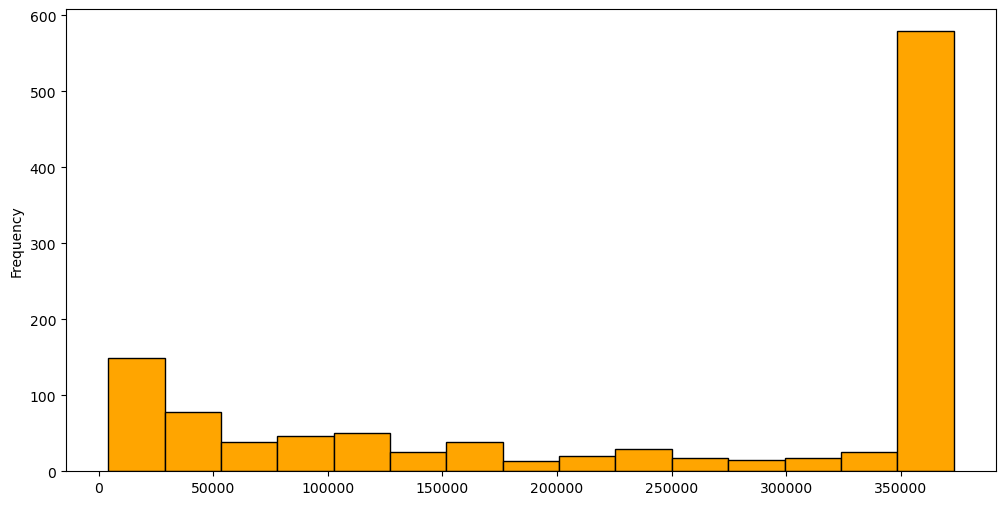

In [40]:
fraud_amount.amount.plot(kind='hist', bins=15, figsize=(12,6), facecolor='orange',edgecolor='black')

###### We've found that fraud amount transaction ranges between 1.3-3.6 lakh
###### Now, we can see that among them most occured were around 340,000-360,000 (3.4-3.6 lakh)

#### 6. Let's take a closer look at nameDest columnm

In [41]:
fraudster= df.nameDest.value_counts()
fraudster

C985934102     98
C1286084959    96
C1590550415    89
C248609774     88
C665576141     87
               ..
M382871047      1
M322765556      1
M1118794441     1
M1127250627     1
M677577406      1
Name: nameDest, Length: 449635, dtype: int64

Since we have large number of unique values, we'll take only top 10 fraudster id name.

Taking the top 10 fraudster ids

In [42]:
fraudster[:10]

C985934102     98
C1286084959    96
C1590550415    89
C248609774     88
C665576141     87
C2083562754    86
C977993101     82
C1360767589    81
C451111351     80
C306206744     79
Name: nameDest, dtype: int64

<Axes: >

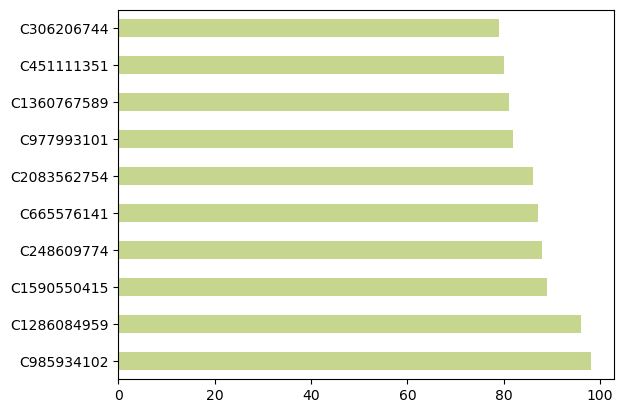

In [43]:
fraudster[:10].plot(kind='barh',color="#C6D68F")

##### 7. Let's take a closer look at step column

<Axes: xlabel='step', ylabel='Density'>

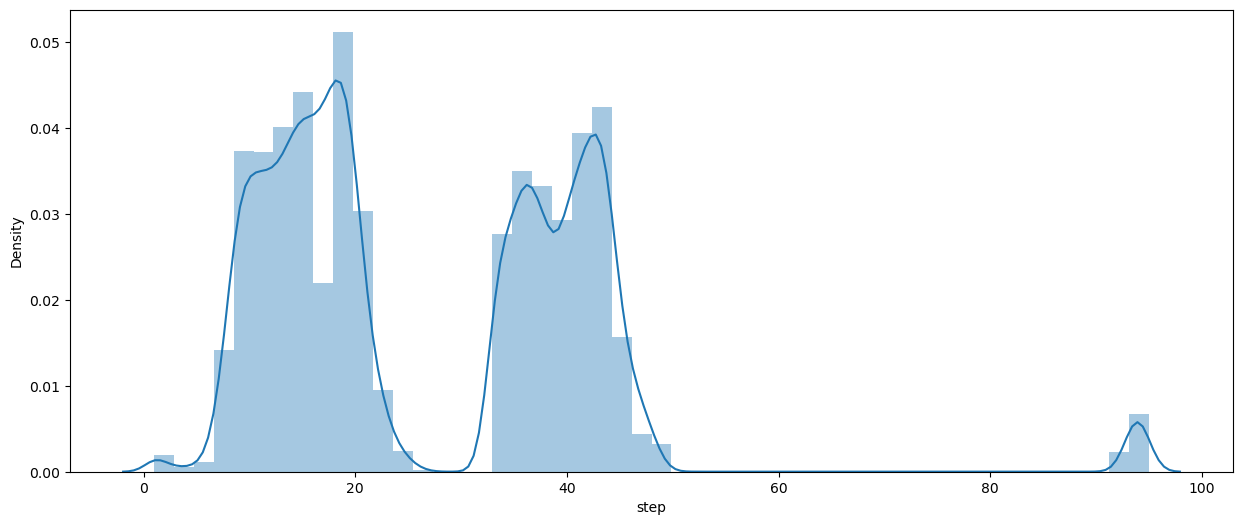

In [44]:
plt.figure(figsize=(15, 6))
sns.distplot(df['step'], bins=50)

##### Distribution of the Step (hour) column

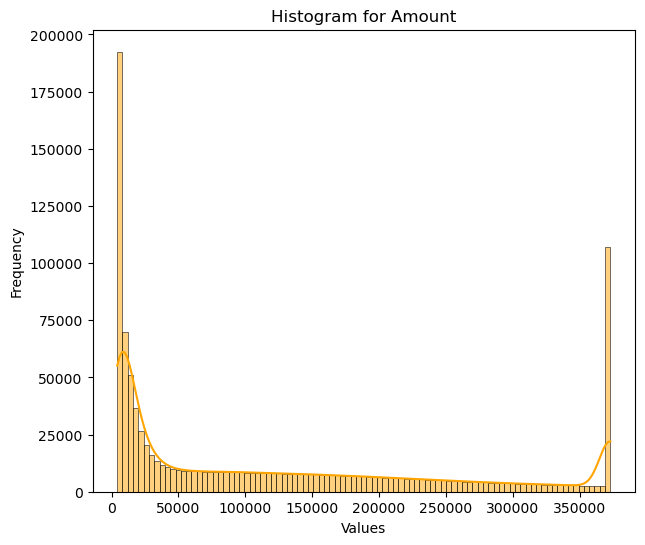

In [45]:
# Histogram
plt.figure(figsize=(7, 6))
sns.histplot(df["amount"], kde=True,color="orange")
plt.title('Histogram for Amount')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

###### Histogram is used to shows the distribution of the amount.

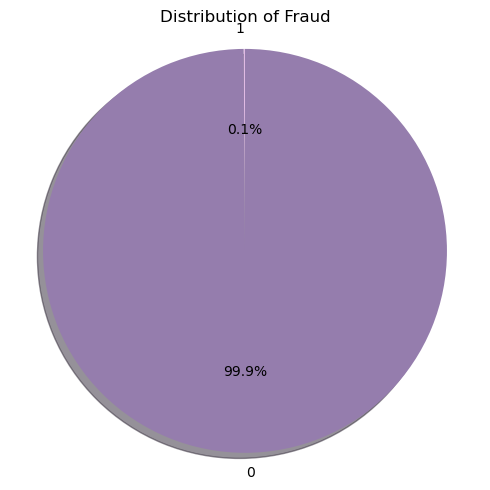

In [46]:
# pie chart
labels = df['isFraud'].unique()
sizes = (df['isFraud'].value_counts()/df['isFraud'].value_counts().sum())*100
sizes = sizes.sort_index(ascending=False)
labels = sizes.index
plt.figure(figsize=(5,5))
colors = ['#E0BBE4', '#957DAD', '#D291BC', '#FEC8D8', '#FFDFD3']
plt.pie(sizes,labels=labels, autopct='%1.1f%%', shadow=True, startangle=90, colors=colors)
plt.axis('equal')
plt.title("Distribution of Fraud")
plt.tight_layout()
plt.show()

The resulting pie chart provides an overview of the class distribution in the credit card fraud dataset. Each slice represents a class ('Fraud' or 'Non-Fraud'), and its size corresponds to the proportion of that class in the dataset. The percentage values displayed within each slice indicate the relative occurrence of each class.It takes value 1 in case of fraud and 0 not fraud.

which means fraud is 0.1%  and not fraud is 99.9% .

### Bivariate Analysis

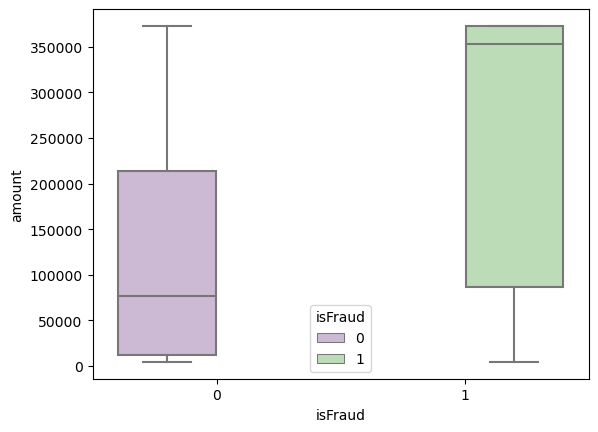

In [47]:
s = sns.boxplot( x="isFraud", y="amount", hue="isFraud",data=df, palette="PRGn",showfliers=True)
plt.show()

###### The boxplot allows us to observe the central tendency, variability, and presence of outliers for each class. The left box corresponds to non-fraudulent transactions (isFraud=0), and the right box corresponds to fraudulent transactions (isFraud=1). The whiskers of the boxplots represent the range of typical values for each class, while any individual points beyond the whiskers represent potential outliers in the data. The plot provides a visual comparison of the transaction amounts for both classes and can help identify any significant differences or patterns in the amounts between the two groups.






### Multivariate

<Axes: >

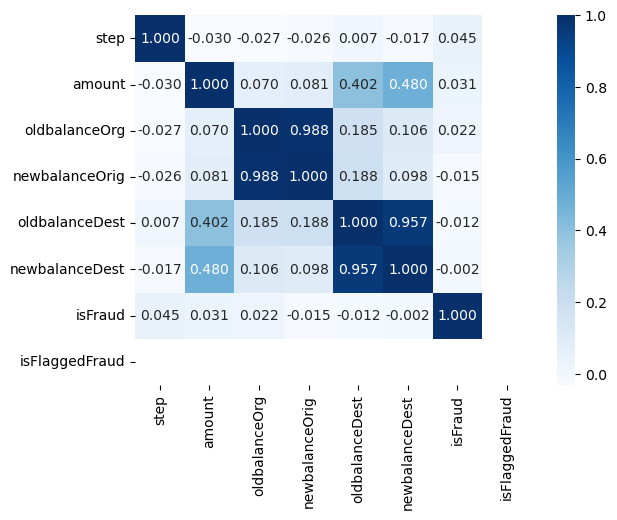

In [48]:
# calculate correlation matrix
corr = df.corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap='Blues' ,fmt=".3f")

###### There is a high correlation between newbalanceOrig and oldbalanceOrg.

Also, between newbalanceDest and oldbalanceDest.

Apart from that, we have a relatively high correlation between amount and newbalanceDest and amount with oldbalanceDest

#### Data Preprocessing
Since the given dataset is highly imbalanced we need to balance the dataset before training our model.

In [49]:
df.isFraud.value_counts()

0    1047433
1       1142
Name: isFraud, dtype: int64

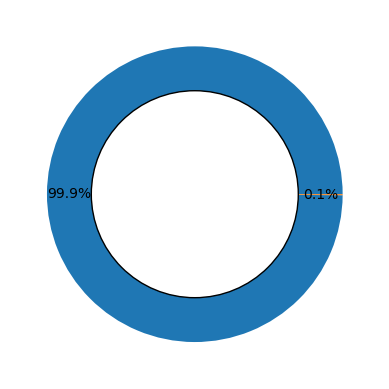

In [50]:
plt.pie(df.isFraud.value_counts(),
        autopct='%1.1f%%', pctdistance=0.85)
centre_circle = plt.Circle((0, 0), 0.70, fc='white',color="black")
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

###### The slices of the donut chart represent the percentage of fraudulent and non-fraudulent transactions, and the inner white circle enhances the chart's visual appeal. The percentage values are also displayed on the chart to provide additional information about the distribution of fraud and non-fraud cases.
which means fraud is 0.1% and not fraud is 99.9% .

In [51]:
# class count
class_count_0, class_count_1 = df['isFraud'].value_counts()
# Separate class
class_0 = df[df['isFraud'] == 0]
class_1 = df[df['isFraud'] == 1]
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (1047433, 11)
class 1: (1142, 11)


#### Under Sampling technique

total class of 1 and0: 0    1142
1    1142
Name: isFraud, dtype: int64


<Axes: title={'center': 'Target-variable (isFraud)'}>

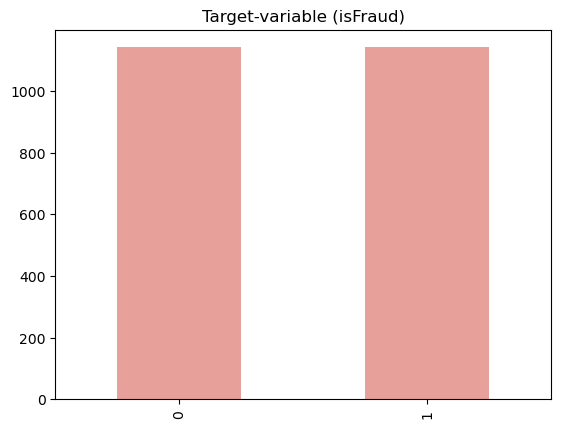

In [52]:
class_0_under = class_0.sample(class_count_1)
df = pd.concat([class_0_under, class_1], axis=0)
print("total class of 1 and0:",df['isFraud'].value_counts())
df['isFraud'].value_counts().plot(kind='bar', title='Target-variable (isFraud)',color="#E8A09A")

##### We Balancing the Dataset,
The under-sampling technique to balance the class distribution of a binary target variable in a dataset. This technique helps address the problem of imbalanced classification, where one class is significantly underrepresented. After under-sampling, the resulting dataset has an equal number of samples for both classes, and this balanced dataset can be used to train a machine learning model for improved performance in predicting both classes.

In [53]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1018716,47,PAYMENT,4220.57,C874926351,14657.030,12000.500,M1593560133,0.00,0.00,0,0
583147,33,CASH_OUT,349287.17,C31868376,0.000,0.000,C183363284,761330.12,1110617.29,0,0
284533,15,TRANSFER,31644.66,C2089326453,0.000,0.000,C1778890613,2032786.64,2064431.30,0,0
997101,45,CASH_IN,215231.13,C1005277953,1924613.174,2059503.936,C2044749637,317865.53,102634.40,0,0
857027,41,PAYMENT,6238.30,C1325450101,20186.000,13947.700,M1370471545,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1047888,95,CASH_OUT,56745.14,C526144262,56745.140,0.000,C79051264,51433.88,108179.02,1,0
1048221,95,TRANSFER,33676.59,C732111322,33676.590,0.000,C1140210295,0.00,0.00,1,0
1048222,95,CASH_OUT,33676.59,C1000086512,33676.590,0.000,C1759363094,0.00,33676.59,1,0
1048323,95,TRANSFER,87999.25,C927181710,87999.250,0.000,C757947873,0.00,0.00,1,0


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2284 entries, 1018716 to 1048324
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            2284 non-null   int64  
 1   type            2284 non-null   object 
 2   amount          2284 non-null   float64
 3   nameOrig        2284 non-null   object 
 4   oldbalanceOrg   2284 non-null   float64
 5   newbalanceOrig  2284 non-null   float64
 6   nameDest        2284 non-null   object 
 7   oldbalanceDest  2284 non-null   float64
 8   newbalanceDest  2284 non-null   float64
 9   isFraud         2284 non-null   int64  
 10  isFlaggedFraud  2284 non-null   int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 214.1+ KB


In [55]:
df.type.unique()

array(['PAYMENT', 'CASH_OUT', 'TRANSFER', 'CASH_IN', 'DEBIT'],
      dtype=object)

In [56]:
df["type"].value_counts()

CASH_OUT    990
TRANSFER    657
PAYMENT     368
CASH_IN     263
DEBIT         6
Name: type, dtype: int64

In [57]:
df["type"] = df["type"].map({"CASH_OUT": 1, "PAYMENT": 2, "CASH_IN": 3, "TRANSFER": 4, "DEBIT": 5})

In [58]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [59]:
df=df.drop(columns=["oldbalanceDest","newbalanceDest"],axis=True)

we removing the oldbalanceDest and newbalanceDest columns is not much significant to the dataset and also by removing it does not affect dependent varaiable

In [60]:
df.dtypes

step                int64
type                int64
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [61]:
df.shape

(2284, 9)

In [62]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,isFraud,isFlaggedFraud
1047888,95,1,56745.14,C526144262,56745.14,0.0,C79051264,1,0
1048221,95,4,33676.59,C732111322,33676.59,0.0,C1140210295,1,0
1048222,95,1,33676.59,C1000086512,33676.59,0.0,C1759363094,1,0
1048323,95,4,87999.25,C927181710,87999.25,0.0,C757947873,1,0
1048324,95,1,87999.25,C409531429,87999.25,0.0,C1827219533,1,0


In [63]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'df' is your DataFrame
le = LabelEncoder()

# Label encode 'nameOrig' column
df['nameOrig'] = le.fit_transform(df['nameOrig'])

df['nameDest'] = le.fit_transform(df['nameDest'])

In [64]:
df.shape

(2284, 9)

In [65]:
df.dtypes

step                int64
type                int64
amount            float64
nameOrig            int32
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest            int32
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [66]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,isFraud,isFlaggedFraud
1018716,47,2,4220.57,2154,14657.030,12000.500,2012,0,0
583147,33,1,349287.17,1488,0.000,0.000,791,0,0
284533,15,4,31644.66,1320,0.000,0.000,736,0,0
997101,45,3,215231.13,7,1924613.174,2059503.936,985,0,0
857027,41,2,6238.30,394,20186.000,13947.700,1967,0,0
...,...,...,...,...,...,...,...,...,...
1047888,95,1,56745.14,1747,56745.140,0.000,1678,1,0
1048221,95,4,33676.59,1981,33676.590,0.000,147,1,0
1048222,95,1,33676.59,0,33676.590,0.000,714,1,0
1048323,95,4,87999.25,2210,87999.250,0.000,1644,1,0


In [67]:
#df=df.drop(columns=["nameOrig","nameDest"],axis=True)

#### Splitting the data into trained data and test data

In [68]:
x = df.drop(columns=["isFraud"],axis=True)
y=df["isFraud"]

In [69]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#### Initialize the StandardScaler

In [70]:
scaler = StandardScaler()

# Fit and transform the scaler on the training data
X_train_scaled = scaler.fit_transform(x_train)

## Model Building

## <a id="61">AdaBoost</a>

In [71]:
model_1 = AdaBoostClassifier()
model_1.fit(X_train_scaled,y_train)

AdaBoostClassifier()

In [72]:
model_1.score(X_train_scaled,y_train)

0.9600437876299945

In [73]:
model_1.score(x_test,y_test)

0.5032822757111597

Confusion Matrix:
[[230   0]
 [227   0]]


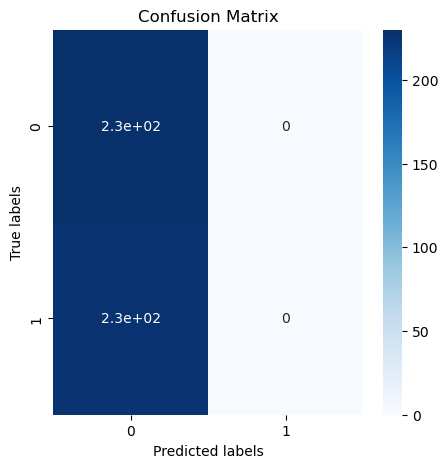

In [74]:
y_pred = model_1.predict(x_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

## <a id="61">Support Vector Machine</a>

In [75]:
model_2=SVC()
model_2.fit(X_train_scaled,y_train)

SVC()

In [76]:
model_2.score(X_train_scaled,y_train)

0.9074986316365626

In [77]:
model_2.score(x_test,y_test)

0.49671772428884026

Confusion Matrix:
[[  0 230]
 [  0 227]]


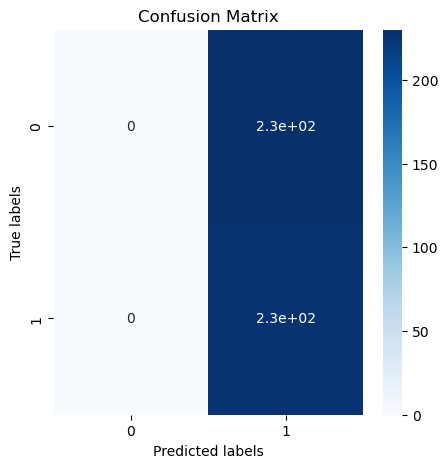

In [78]:
y_pred = model_2.predict(x_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

## <a id="61">LogisticRegression</a>

In [79]:
model_3 = LogisticRegression()
model_3.fit(X_train_scaled,y_train)

LogisticRegression()

In [80]:
model_3.score(X_train_scaled,y_train)

0.8932676518883416

In [81]:
model_3.score(x_test,y_test)

0.7680525164113785

Confusion Matrix:
[[128 102]
 [  4 223]]


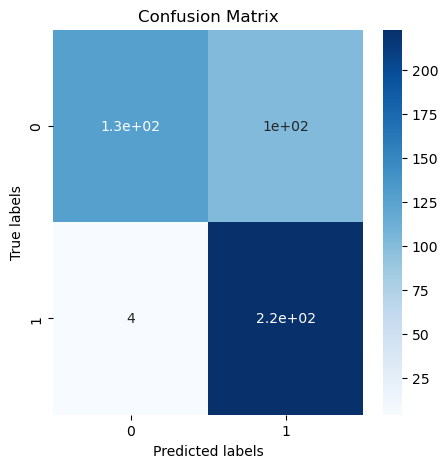

In [82]:
y_pred = model_3.predict(x_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

## <a id="61">KNeighborsClassifier</a>

In [83]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
neighbors=list(range(1,10,2))
cv_scores=[]
for k in neighbors:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,x,y,cv=10,scoring='accuracy')
    cv_scores.append(scores.mean())

In [84]:
MSE=[1-x for x in cv_scores]
MSE

[0.04418332950279624,
 0.036309660614418204,
 0.035874894660231305,
 0.041134222017926825,
 0.04463341760514827]

In [85]:
optimal_k=neighbors[MSE.index(min(MSE))]
optimal_k

5

Text(0, 0.5, 'Error')

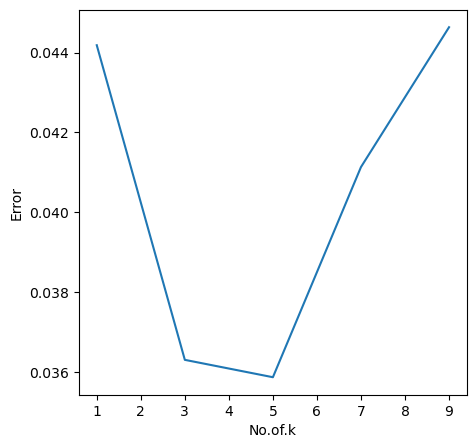

In [86]:
plt.figure(figsize=(5, 5))
plt.plot(neighbors,MSE)
plt.xlabel('No.of.k')
plt.ylabel('Error')

In [87]:
model_4=KNeighborsClassifier(n_neighbors=3)
model_4.fit(X_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=3)

In [88]:
model_4.score(X_train_scaled,y_train)

0.9376026272577996

In [89]:
model_4.score(x_test,y_test)

0.49671772428884026

Confusion Matrix:
[[  0 230]
 [  0 227]]


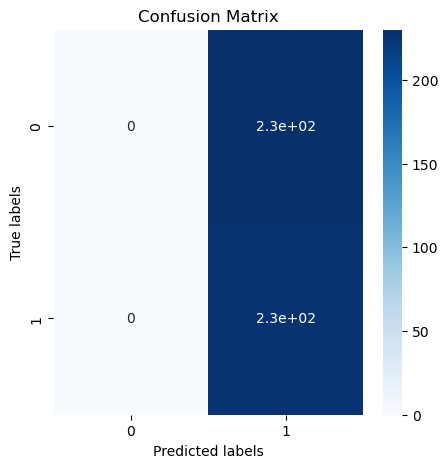

In [90]:
y_pred = model_4.predict(x_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

## <a id="61">RandomForestClassifier</a>

In [91]:
model_5 = RandomForestClassifier()
model_5.fit(X_train_scaled,y_train)

RandomForestClassifier()

In [92]:
model_5.score(X_train_scaled,y_train)

1.0

In [93]:
model_5.score(x_test,y_test)

0.6783369803063457

Confusion Matrix:
[[187  43]
 [104 123]]


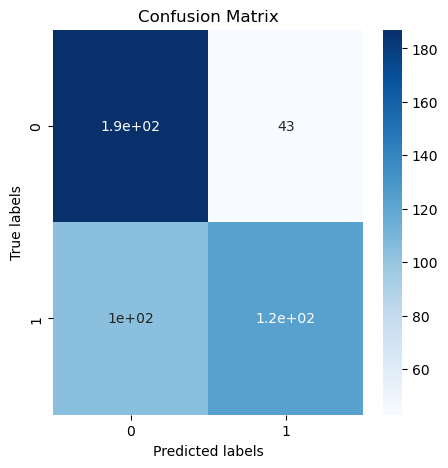

In [94]:
y_pred = model_5.predict(x_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

## <a id="61">DecisionTreeClassifier</a>

In [95]:
model_6=DecisionTreeClassifier()
model_6.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [96]:
model_6.score(X_train_scaled,y_train)

1.0

In [97]:
model_6.score(x_test,y_test)

0.49671772428884026

Confusion Matrix:
[[  0 230]
 [  0 227]]


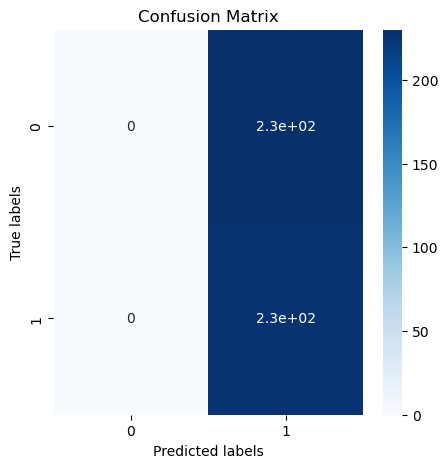

In [98]:
y_pred = model_6.predict(x_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

## <a id="61">XGBoost</a>

In [99]:
model_7 = XGBClassifier()
model_7.fit(X_train_scaled,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [100]:
model_7.score(X_train_scaled,y_train)

1.0

In [101]:
model_7.score(x_test,y_test)

0.5054704595185996

Confusion Matrix:
[[229   1]
 [225   2]]


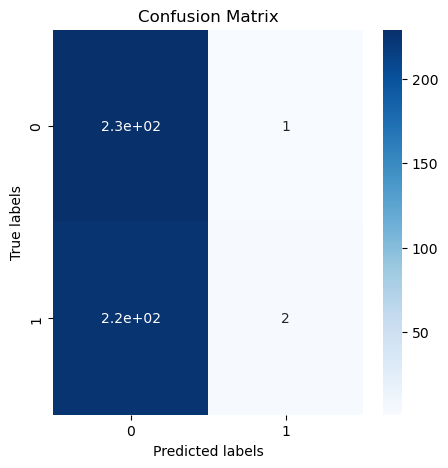

In [102]:
y_pred = model_7.predict(x_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [103]:
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVC": SVC(),
    "Ada Boost": AdaBoostClassifier(),
    "XGBoost": XGBClassifier(),

}

In [104]:
for name, model in models.items():
    print(f'Training Model {name} \n--------------')
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(x_test)
    print(f'Training Accuracy: {accuracy_score(y_train, model.predict(X_train_scaled))}')
    print(f'Testing Accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'Testing Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
    print("Recall Score : ",recall_score(y_test, y_pred, pos_label='positive', average='micro'))    
    print("Precision Score : ",precision_score(y_test, y_pred,  pos_label='positive',average='micro'))     
    print(f"Testing F-1:", f1_score(y_test, y_pred, pos_label='positive', average='micro' )        )
    print(f"Testing F-Beta:", fbeta_score(y_test, y_pred, beta=0.5, pos_label='positive', average='micro'))
    print('-'*30)

Training Model Logistic Regression 
--------------
Training Accuracy: 0.8932676518883416
Testing Accuracy: 0.7680525164113785
Testing Confusion Matrix: 
[[128 102]
 [  4 223]]
Recall Score :  0.7680525164113785
Precision Score :  0.7680525164113785
Testing F-1: 0.7680525164113785
Testing F-Beta: 0.7680525164113785
------------------------------
Training Model KNN 
--------------
Training Accuracy: 0.9195402298850575
Testing Accuracy: 0.5010940919037199
Testing Confusion Matrix: 
[[  2 228]
 [  0 227]]
Recall Score :  0.5010940919037199
Precision Score :  0.5010940919037199
Testing F-1: 0.5010940919037199
Testing F-Beta: 0.5010940919037199
------------------------------
Training Model Decision Tree 
--------------
Training Accuracy: 1.0
Testing Accuracy: 0.49671772428884026
Testing Confusion Matrix: 
[[  0 230]
 [  0 227]]
Recall Score :  0.49671772428884026
Precision Score :  0.49671772428884026
Testing F-1: 0.49671772428884026
Testing F-Beta: 0.49671772428884026
----------------------

###### As we see the Random Forest  is the best algorithm with :

accuracy : 99%    
 F1 score : 49%        
.......  As comparing to all algorithm  ......

### Receiver Operating Characteristic

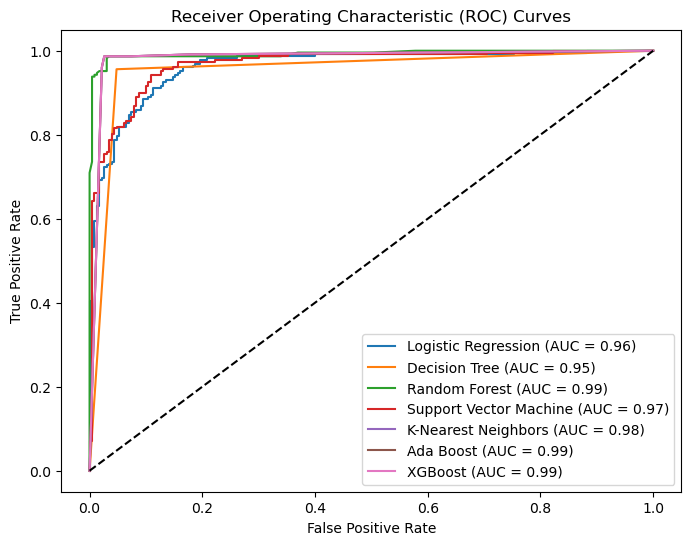

In [105]:
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
# Assume X and y are your feature and target variables, respectively
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Logistic Regression
logreg_model = LogisticRegression()
logreg_model.fit(x_train, y_train)
logreg_preds = logreg_model.predict(x_test)
logreg_accuracy = accuracy_score(y_test, logreg_preds)
logreg_probs = logreg_model.predict_proba(x_test)[:, 1]
logreg_auc = roc_auc_score(y_test, logreg_probs)
logreg_fpr, logreg_tpr, _ = roc_curve(y_test, logreg_probs)

# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)
dt_preds = dt_model.predict(x_test)
dt_accuracy = accuracy_score(y_test, dt_preds)
dt_probs = dt_model.predict_proba(x_test)[:, 1]
dt_auc = roc_auc_score(y_test, dt_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)
rf_preds = rf_model.predict(x_test)
rf_accuracy = accuracy_score(y_test, rf_preds)
rf_probs = rf_model.predict_proba(x_test)[:, 1]
rf_auc = roc_auc_score(y_test, rf_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)

# Support Vector Machine
svm_model = SVC(probability=True)
svm_model.fit(x_train, y_train)
svm_preds = svm_model.predict(x_test)
svm_accuracy = accuracy_score(y_test, svm_preds)
svm_probs = svm_model.predict_proba(x_test)[:, 1]
svm_auc = roc_auc_score(y_test, svm_probs)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)

# K-Nearest Neighbors
knn_model = KNeighborsClassifier()
knn_model.fit(x_train, y_train)
knn_preds = knn_model.predict(x_test)
knn_accuracy = accuracy_score(y_test, knn_preds)
knn_probs = knn_model.predict_proba(x_test)[:, 1]
knn_auc = roc_auc_score(y_test, knn_probs)
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs) 

# Ada Boost
ab_model = AdaBoostClassifier()
ab_model.fit(x_train, y_train)
ab_preds = ab_model.predict(x_test)
ab_accuracy = accuracy_score(y_test, ab_preds)
ab_probs = ab_model.predict_proba(x_test)[:, 1]
ab_auc = roc_auc_score(y_test, ab_probs)
ab_fpr, ab_tpr, _ = roc_curve(y_test, ab_probs)

#XGBoost
xg_model = AdaBoostClassifier()
xg_model.fit(x_train, y_train)
xg_preds = ab_model.predict(x_test)
xg_accuracy = accuracy_score(y_test, ab_preds)
xg_probs = ab_model.predict_proba(x_test)[:, 1]
xg_auc = roc_auc_score(y_test, ab_probs)
xg_fpr, ab_tpr, _ = roc_curve(y_test, ab_probs)


# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(logreg_fpr, logreg_tpr, label='Logistic Regression (AUC = {:.2f})'.format(logreg_auc))
plt.plot(dt_fpr, dt_tpr, label='Decision Tree (AUC = {:.2f})'.format(dt_auc))
plt.plot(rf_fpr, rf_tpr, label='Random Forest (AUC = {:.2f})'.format(rf_auc))
plt.plot(svm_fpr, svm_tpr, label='Support Vector Machine (AUC = {:.2f})'.format(svm_auc))
plt.plot(knn_fpr, knn_tpr, label='K-Nearest Neighbors (AUC = {:.2f})'.format(knn_auc))
plt.plot(knn_fpr, knn_tpr, label='Ada Boost (AUC = {:.2f})'.format(ab_auc))
plt.plot(knn_fpr, knn_tpr, label='XGBoost (AUC = {:.2f})'.format(xg_auc))
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend()
plt.show()

#####  The ROC curve is a graphical representation that illustrates the performance of a binary classifier at different classification thresholds. Each curve in the plot corresponds to a specific classifier, and the area under the curve (AUC) is used as a metric to quantify the classifier's overall performance. 

#### Inferences:
             The ROC curve helps visualize and compare the performance of different classifiers in terms of their ability to  distinguish between the positive and negative classes. A classifier with a higher AUC value is generally considered better, as it indicates a better trade-off between true positive rate and false positive rate across different threshold levels.
             The Random Forest classifier achieved the highest AUC score among all the classifiers evaluated, suggesting that it performed better at distinguishing between fraudulent and non-fraudulent transactions compared to the other models tested.
       The ROC curve for the Random Forest classifier is located closer to the top-left corner of the plot, which indicates a better balance between true positive rate and false positive rate across various threshold levels. This implies that the Random Forest model has a higher true positive rate while maintaining a lower false positive rate compared to the other models.

###### The ROC curve of the Random Forest classifier appears to have a larger area under the curve, further indicating its superior performance compared to the other classifiers.







### Prediction for new data

In [106]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,isFraud,isFlaggedFraud
1018716,47,2,4220.57,2154,14657.030,12000.500,2012,0,0
583147,33,1,349287.17,1488,0.000,0.000,791,0,0
284533,15,4,31644.66,1320,0.000,0.000,736,0,0
997101,45,3,215231.13,7,1924613.174,2059503.936,985,0,0
857027,41,2,6238.30,394,20186.000,13947.700,1967,0,0
...,...,...,...,...,...,...,...,...,...
1047888,95,1,56745.14,1747,56745.140,0.000,1678,1,0
1048221,95,4,33676.59,1981,33676.590,0.000,147,1,0
1048222,95,1,33676.59,0,33676.590,0.000,714,1,0
1048323,95,4,87999.25,2210,87999.250,0.000,1644,1,0


In [107]:
# Example data point for a potential fraudulent transaction
prediction = np.array([[9,2,4220.57,691,143731.00,142369.28,2033,0]])

# Preprocess and scale the data point using the same scaler
predict_scaled = scaler.transform(prediction)

# Make the prediction
predicting_values = model.predict(predict_scaled)[0]

# Check if it is fraud or not
if predicting_values == 1:
    print("Fraudulent Transaction")
else:
    print("Not Fraudulent Transaction")

Not Fraudulent Transaction


In [108]:
# Example data point for a potential fraudulent transaction
prediction = np.array([[95,1,56745.14,1708,56745.14,0.00,1649,0]])

# Preprocess and scale the data point using the same scaler
predict_scaled = scaler.transform(prediction)

# Make the prediction
predicting_values = model.predict(predict_scaled)[0]

# Check if it is fraud or not
if predicting_values == 1:
    print("Fraudulent Transaction")
else:
    print("Not Fraudulent Transaction")

Fraudulent Transaction


In [109]:
from joblib import dump

In [110]:
dump(model_5, './../savedModels/Online payment fraud detection(capstone)-Copy1.joblib')

['./../savedModels/Online payment fraud detection(capstone)-Copy1.joblib']

### In this Dataset isFraud is an dependent varaiable we can see isfraud contains 0's and 1's.
###### which means 0 is Known as Not Fraudulent Transaction and 1 is known as Fraudulent Transaction

## CONCLUSION:

1. Dataset Overview: The dataset contains 6,362,620 rows and 11 columns. Each row represents a transaction, and the columns represent various attributes of the transactions, such as time, transaction type, transaction amount, customer information, and recipient information. The target variable is `isFraud`, which indicates whether a transaction is fraudulent (1) or not (0).

2. Features: The dataset includes features such as `step`, `type`, `amount`, `nameOrig`, `oldbalanceOrg`, `newbalanceOrig`, `nameDest`, `oldbalanceDest`, `newbalanceDest`, `isFraud`, and `isFlaggedFraud`.

3. Target Variable: The primary task is to predict whether a transaction is fraudulent (`isFraud` = 1) or not (`isFraud` = 0). This is a binary classification problem.

4. Fraud Detection: The goal is to develop a machine learning model that can effectively detect fraudulent transactions to prevent financial losses and protect customers and businesses.

5. Best Algorithm: According to the inference made from the provided code, the Random Forest classifier achieved the highest AUC score among all the classifiers evaluated. A higher AUC score indicates better performance in distinguishing between fraudulent and non-fraudulent transactions. Therefore, it can be concluded that the Random Forest algorithm is the best-performing model for this specific dataset and task of online payment fraud detection.

###### However, it's important to note that the choice of the "best" algorithm may depend on various factors, including data size, data quality, feature engineering, and specific performance metrics. Therefore, it's always recommended to perform thorough model evaluation and hyperparameter tuning to ensure the most suitable algorithm for a given problem. Additionally, you may want to explore other machine learning algorithms and techniques to further improve the model's performance.